# Analyzing the geothermal results
I have reduced all the simulation results to a single data file of the recovery factors and CO2 emission. In this notebook, I'm going to analyze the data.

In [1]:
using Dierckx, DataFrames, PyPlot, JLD, CoolProp
@load "input_param.jld"

INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.5/Dierckx.ji for module Dierckx.
INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.5/DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.5/Blosc.ji for module Blosc.
INFO: Recompiling stale cache file /home/ali/.julia/lib/v0.5/JLD.ji for module JLD.


16-element Array{Symbol,1}:
 :MW_CO2    
 :MW_coal   
 :MW_gas    
 :e_igcc    
 :e_ngcc    
 :e_pc      
 :em_coal   
 :em_gas    
 :eta_driver
 :eta_pump  
 :ex_ccs    
 :ex_coal   
 :ex_gas    
 :η_igcc    
 :η_ngcc    
 :η_pc      

In [2]:
em_gas*1e3

0.05499999999999999

In [3]:
df_geo = readtable("geothermal_final_results.csv")

,q_m3_s,k_m2,L_m,t_life_s,R_th,R_pr,R_ze,c_CO2,COP,c_CO2_heat,heat_per_m3
1,0.013888888888888888,2.0e-14,500.0,1.0576335144873849e9,-0.3109192087334036,-3.7883184936699945,-5.077606079429243,0.2865083523909441,1.6459918591020446,0.03341450305228407,154359.8334911328
2,0.013888888888888888,2.0e-14,650.0,1.4291956059324093e9,-0.4171418544683885,-4.2142974097433425,-5.620729197422762,0.3125403972620931,1.506482033476301,0.036508898730829256,154966.697066018
3,0.013888888888888888,2.0e-14,800.0,1.7765941755595894e9,-0.5235231906527951,-4.636011430730794,-6.158414574181762,0.3383118096557706,1.3895068176525533,0.0395823894501774,155609.45776416382
4,0.013888888888888888,2.0e-14,900.0,2.028329490159246e9,-0.6034100843091478,-4.951108126288355,-6.560162861017654,0.35756771882873284,1.3148764857132726,0.041829023940727406,155504.48895917484
5,0.013888888888888888,2.0e-14,1000.0,2.255901282941059e9,-0.6767241870505757,-5.239711644024146,-6.928132346130786,0.3752046004681422,1.2523011627065508,0.04391914791577019,155750.9071207576
6,0.013888888888888888,5.0e-14,500.0,1.0576335144873849e9,0.38847613288727284,-1.0563054404640468,-1.5942894365916598,0.11955199913946951,3.944646839830814,0.013942946538240407,154359.8334907042
7,0.013888888888888888,5.0e-14,650.0,1.4291956059324093e9,0.35212369091246043,-1.2093538730993671,-1.7894261882016933,0.128904958911628,3.6525863487830392,0.015057823347098905,154966.69706590372
8,0.013888888888888888,5.0e-14,800.0,1.7765941755595894e9,0.3130415259375661,-1.368180506549535,-1.9919301458506569,0.1386110309558049,3.3914080486119396,0.01621745281359192,155609.45776342993
9,0.013888888888888888,5.0e-14,900.0,2.028329490159246e9,0.2827322504417292,-1.4896146311677931,-2.1467586547389366,0.14603200523803178,3.219550294959021,0.017083131170870573,155504.48895936908
10,0.013888888888888888,5.0e-14,1000.0,2.255901282941059e9,0.25465926444480214,-1.6014950366203886,-2.2894061716909953,0.15286914112680153,3.0736691130420573,0.017893923508755846,155750.90712113059


# Sensitivity analysis

## Step 1
Find a list of permeability, well-spacing, and flow rates

In [4]:
flow_rates = df_geo[:q_m3_s] # [m^3/s]
k          = df_geo[:k_m2]   # [m^2]
L          = df_geo[:L_m]    # [m]
flow_range = union(flow_rates)
k_range    = union(k)
L_range    = union(L)

5-element Array{Float64,1}:
  500.0
  650.0
  800.0
  900.0
 1000.0

## Step 2
For a fixed value of well spacing, plot the effect of perm for different flow rates, and see if the results look good:
### Effect of permeability

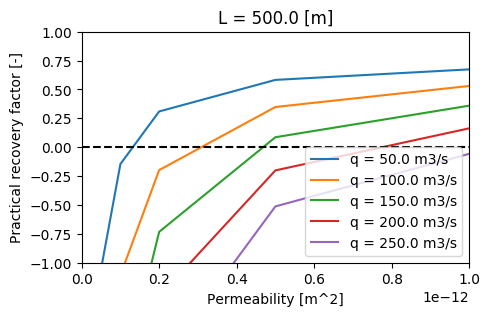

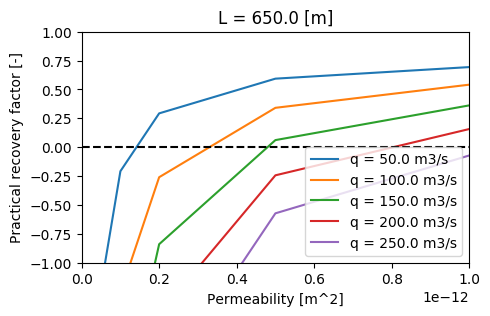

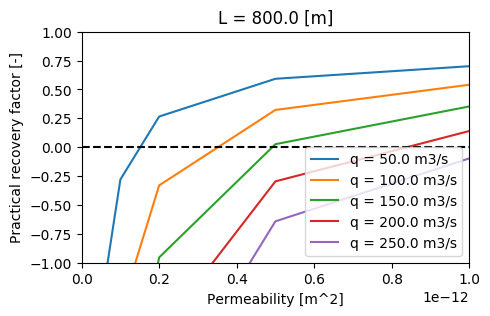

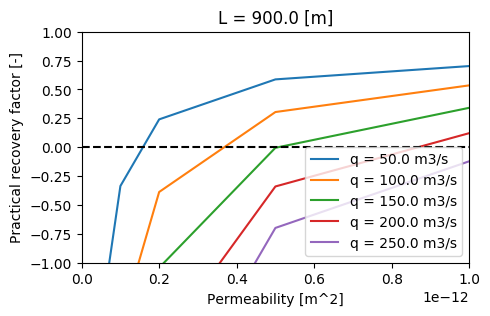

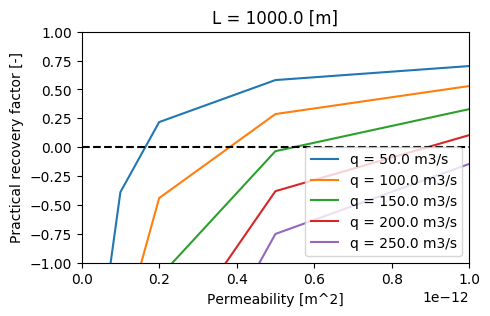

In [5]:
for L_well in L_range
    figure(figsize=(5,3))
    xlabel("Permeability [m^2]")
    ylabel("Practical recovery factor [-]")
    for q in flow_range
        df_temp = df_geo[(df_geo[:q_m3_s].==q) & (df_geo[:L_m].==L_well), :]
        plot(df_temp[:k_m2], df_temp[:R_pr], label = "q = $(q*3600) m3/s")
    end
    legend()
    plot([0, 1e-12], [0,0], "--k")
    axis([0, 1e-12, -1,1])
    title("L = $L_well [m]")
end

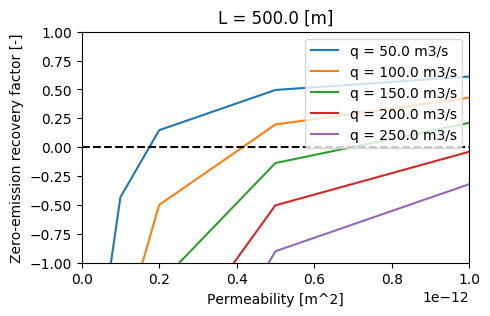

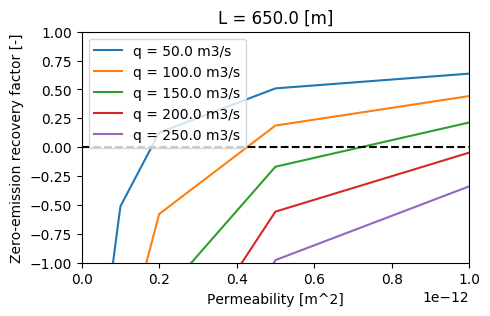

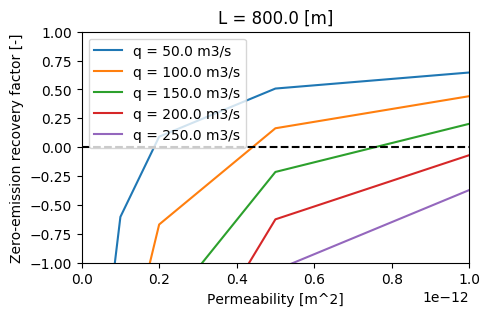

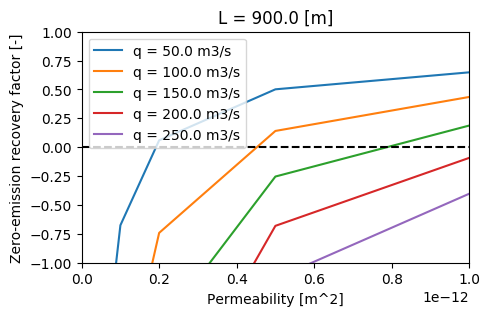

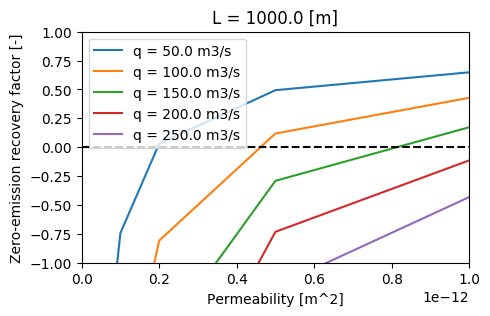

In [19]:
for L_well in L_range
    figure(figsize=(5,3))
    xlabel("Permeability [m^2]")
    ylabel("Zero-emission recovery factor [-]")
    for q in flow_range
        df_temp = df_geo[(df_geo[:q_m3_s].==q) & (df_geo[:L_m].==L_well), :]
        plot(df_temp[:k_m2], df_temp[:R_ze], label = "q = $(q*3600) m3/s")
    end
    legend()
    plot([0, 1e-12], [0,0], "--k")
    axis([0, 1e-12, -1,1])
    title("L = $L_well [m]")
end

### Effect of flow rate
Change the flow rate in different well spacing in different reservoirs

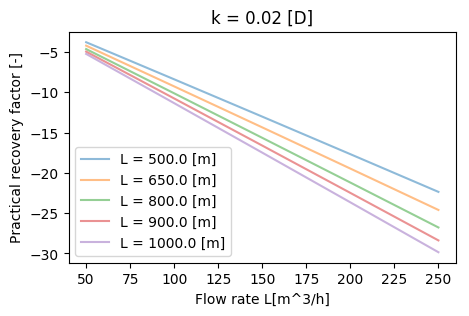

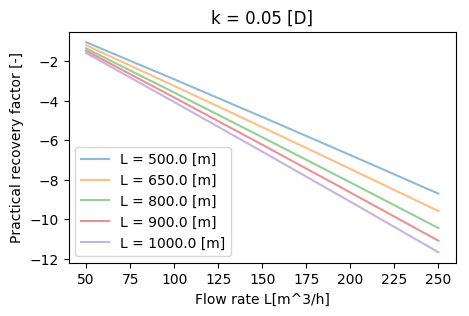

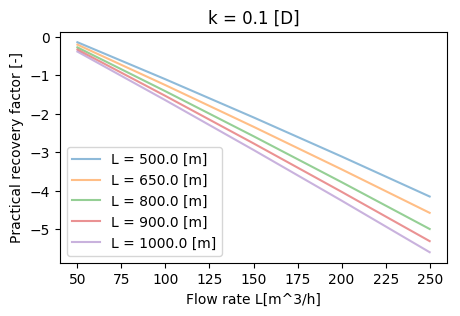

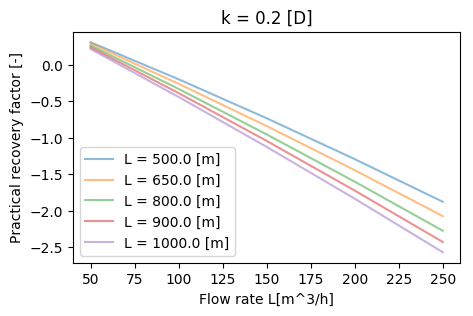

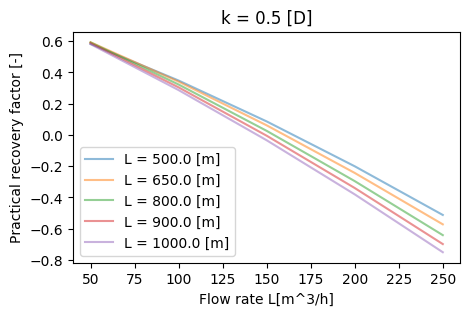

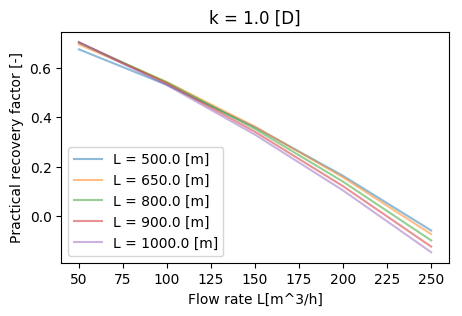

In [6]:
for k_res in k_range
    figure(figsize=(5,3))
    xlabel("Flow rate \L[m^3/h]")
    ylabel("Practical recovery factor [-]")
    for L_well in L_range
        df_temp = df_geo[(df_geo[:k_m2].==k_res) & (df_geo[:L_m].==L_well), :]
        plot(df_temp[:q_m3_s]*3600, df_temp[:R_pr], alpha = 0.5, label = "L = $L_well [m]")
    end
    legend()
    #plot([0, 1e-12], [0,0], "--k")
    #axis([0, 1e-12, -1,1])
    title("k = $(k_res*1e12) [D]")
end

### Effect of flow rate on the project life time
Conclusion: project life time does not depend on the permeability of the reservoir. It is important for the project to have an acceptable lifetime to justify the capital investments.

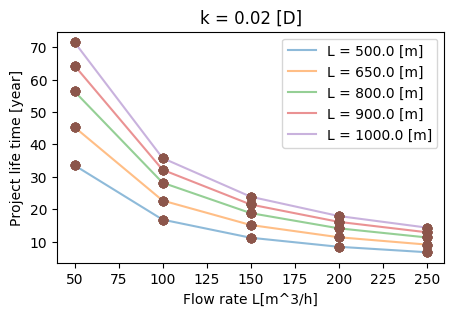

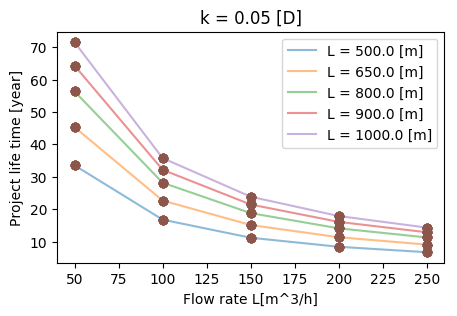

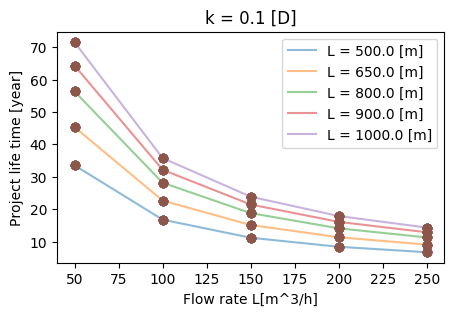

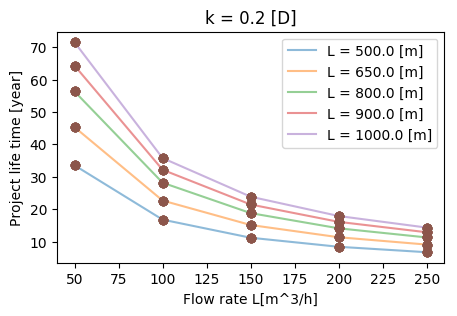

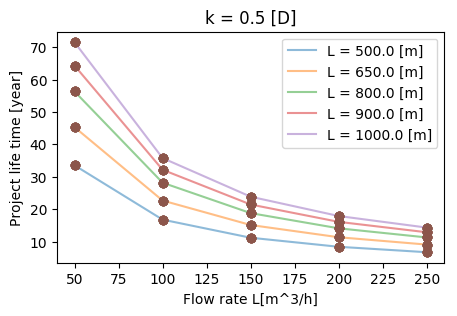

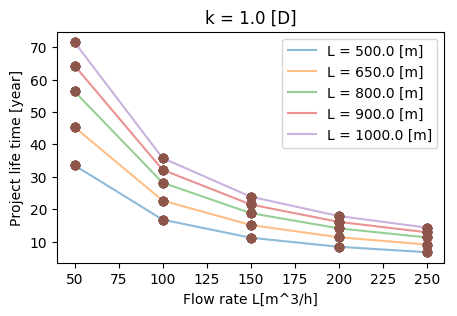

In [7]:
for k_res in k_range
    figure(figsize=(5,3))
    xlabel("Flow rate \L[m^3/h]")
    ylabel("Project life time [year]")
    for L_well in L_range
        df_temp = df_geo[(df_geo[:k_m2].==k_res) & (df_geo[:L_m].==L_well), :]
        plot(df_temp[:q_m3_s]*3600, df_temp[:t_life_s]/(3600*24*365), alpha = 0.5, label = "L = $L_well [m]")
    end
    legend()
    #plot([0, 1e-12], [0,0], "--k")
    #axis([0, 1e-12, -1,1])
    plot(df_geo[:q_m3_s]*3600, df_geo[:t_life_s]/(3600*24*365), "o")
    title("k = $(k_res*1e12) [D]")
end

### CO2 emission:

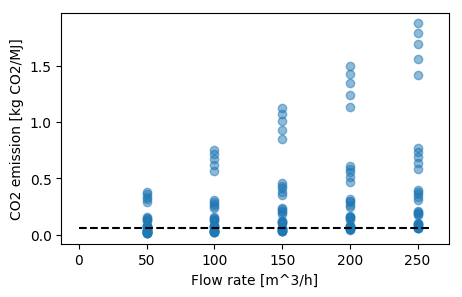

PyObject Text(24,0.5,u'CO2 emission [kg CO2/MJ]')

In [8]:
figure(figsize=(5,3))
plot(df_geo[:q_m3_s]*3600, df_geo[:c_CO2], alpha = 0.5, "o")
plot([0, 260], [em_gas, em_gas]*1e3, "--k")
xlabel("Flow rate [m^3/h]")
ylabel("CO2 emission [kg CO2/MJ]")

In [9]:
df_geo.colindex

DataFrames.Index(Dict(:heat_per_m3=>11,:R_ze=>7,:c_CO2=>8,:k_m2=>2,:t_life_s=>4,:c_CO2_heat=>10,:COP=>9,:R_th=>5,:q_m3_s=>1,:L_m=>3…),Symbol[:q_m3_s,:k_m2,:L_m,:t_life_s,:R_th,:R_pr,:R_ze,:c_CO2,:COP,:c_CO2_heat,:heat_per_m3])

## Find the optimum range
Apply the following criteria:
  + life time longer than 30 years
  + positive zero-emission recovery factors
  + lower that two times methane emission

In [10]:
T_c = 2.0+273.15 # [K]
T_h = 22+273.15 # [K]
COP_th = T_h/(T_h-T_c)
COP_air = 2.0 # average value (per unit electricity)
COP_geo = 5.0 # shallow heat (comes from the sun)
COP_methane = 1.0 # ignoring heat loss

t_life_crit = 30       # years
c_CO2_crit  = em_gas*1e3*2.0 # kg/MJ

u_ht = 1.0 # W/m2/K
A_ht = 4*10.0*3.0 # only surrounding walls
Q_heat = u_ht*A_ht*(T_h-T_c)/1000 # kJ/s
n_houses = 400 # number of houses to be covered by the geothermal project
m_water = Q_heat*1000*n_houses/(PropsSI("HMASS", "T", 80+273.15, "P", 1e5, "H2O")-PropsSI("HMASS", "T", 40+273.15, "P", 1e5, "H2O"))
q_water = m_water/PropsSI("D", "T", 40+273.15, "P", 1e5, "H2O") # [m3/s]

df_practical = df_geo[(df_geo[:t_life_s].>(30.0*24*3600)) & (df_geo[:R_ze].>0.0) & (df_geo[:c_CO2].<c_CO2_crit), :]

,q_m3_s,k_m2,L_m,t_life_s,R_th,R_pr,R_ze,c_CO2,COP,c_CO2_heat,heat_per_m3
1,0.013888888888888888,2.0e-13,500.0,1.0576335144873849e9,0.7381738036994762,0.309701086145861,0.14736888483597282,0.03607382251330849,13.072926092762412,0.004207168281204447,154359.8334913233
2,0.013888888888888888,2.0e-13,650.0,1.4291956059324093e9,0.7367564636028363,0.2931178952223784,0.12622531640853252,0.037087239736410205,12.695377077319357,0.004332285655245249,154966.69706595305
3,0.013888888888888888,2.0e-13,800.0,1.7765941755595894e9,0.7313238842340033,0.26573495554621773,0.0913120683214276,0.03876064160550892,12.12793562078382,0.004534984495279287,155609.45776221584
4,0.013888888888888888,2.0e-13,900.0,2.028329490159246e9,0.7258034178163371,0.24113211638923684,0.05994344839627702,0.04026414844287997,11.676824264748285,0.004710184785947502,155504.48895949338
5,0.013888888888888888,2.0e-13,1000.0,2.255901282941059e9,0.72035099019025,0.2176132670727928,0.029956915517810837,0.04170141145666266,11.267464121861853,0.004881311305290558,155750.90712099586
6,0.013888888888888888,5.0e-13,500.0,1.0576335144873849e9,0.8081133378592298,0.5829023914588926,0.49570054911008804,0.01937818718862323,24.336147185191805,0.002260012629832659,154359.8334873246
7,0.013888888888888888,5.0e-13,650.0,1.4291956059324093e9,0.8136830181358725,0.5936122488687946,0.5093556173077132,0.01872369590246255,25.1465573715559,0.0021871781169621376,154966.69705986636
8,0.013888888888888888,5.0e-13,800.0,1.7765941755595894e9,0.8149803558933212,0.5925180479655594,0.5079605111560882,0.01879056373543804,25.01716141306308,0.0021984908316289207,155609.45776139223
9,0.013888888888888888,5.0e-13,900.0,2.028329490159246e9,0.8144176512885376,0.5872814658907457,0.5012838690107008,0.01911057708445443,24.60194600427421,0.0022355955090074824,155504.48895593
10,0.013888888888888888,5.0e-13,1000.0,2.255901282941059e9,0.8134893353392915,0.5814349278109232,0.4938295329589271,0.019467865522665804,24.135627856582598,0.0022787888646120156,155750.90712288485


In [11]:
flow_rates_pr = df_practical[:q_m3_s] # [m^3/s]
k_pr          = df_practical[:k_m2]   # [m^2]
L_pr          = df_practical[:L_m]    # [m]
flow_range_pr = union(flow_rates_pr)
k_range_pr    = union(k_pr)
L_range_pr    = union(L_pr)

5-element Array{Float64,1}:
  500.0
  650.0
  800.0
  900.0
 1000.0

In [12]:
k_range_pr

3-element Array{Float64,1}:
 2.0e-13
 5.0e-13
 1.0e-12

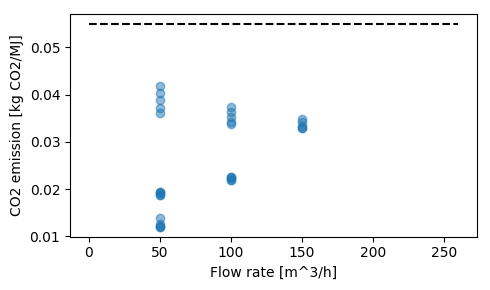

In [13]:
figure(figsize=(5,3))
plot(df_practical[:q_m3_s]*3600, df_practical[:c_CO2], alpha = 0.5, "o")
plot([0, 260], [em_gas, em_gas]*1e3, "--k")
xlabel("Flow rate [m^3/h]")
ylabel("CO2 emission [kg CO2/MJ]")
tight_layout()
savefig("carbon_emission_geothermal.png")

## Compare with the current state of technology
The theoretical COP can be calculated based on the temperature of the outside (temperature outside of the house, where heat is extracted) and the desirable temperature inside (where heat is delivered). It is calculated by 
$$COP_{th} = \frac{T_h}{T_h-T_c}$$

## compare with a methane burner
Find cases with a COP less than 1.0

In [14]:
df_current = df_geo[df_geo[:COP].<1.0, :]

,q_m3_s,k_m2,L_m,t_life_s,R_th,R_pr,R_ze,c_CO2,COP,c_CO2_heat,heat_per_m3
1,0.027777777777777776,2.0e-14,500.0,5.2881675724369246e8,-1.4896006597910125,-8.392551039054569,-10.948002574794574,0.5678781190533346,0.8303991056944046,0.06623321198546733,154381.6639690382
2,0.027777777777777776,2.0e-14,650.0,7.145978029662046e8,-1.7122087135806778,-9.273157810434324,-12.070776208303762,0.6216929773043197,0.757309489541534,0.07262552596996552,154986.88886600762
3,0.027777777777777776,2.0e-14,800.0,8.882970877797947e8,-1.9307034992801413,-10.132813446093179,-13.166837143768806,0.674227488372361,0.6971928803653511,0.07888778205993477,155627.71653707785
4,0.027777777777777776,2.0e-14,900.0,1.014164745079623e9,-2.093237526985916,-10.770749875819991,-13.980206091670489,0.7132124924112215,0.6591843553909711,0.08343644619323339,155522.03361709492
5,0.027777777777777776,2.0e-14,1000.0,1.1279506414705296e9,-2.24193940102624,-11.353836351726976,-14.723641348451894,0.7488455548277595,0.627434575966892,0.08765854179337128,155767.4288726441
6,0.041666666666666664,2.0e-14,500.0,3.525445048291284e8,-2.6752686083825026,-13.024069200009153,-16.85318823001167,0.8509153400005594,0.5541762712007869,0.09924640021274497,154389.01848403364
7,0.041666666666666664,2.0e-14,650.0,4.763985353108032e8,-3.0142214654650266,-14.359146968648755,-18.555412385027164,0.9325034258618682,0.5048843843652837,0.10893583105990363,154993.69152911895
8,0.041666666666666664,2.0e-14,800.0,5.921980585198631e8,-3.3447887443224977,-15.656585260321666,-20.209646206910122,1.0117913214641017,0.4645818493464104,0.11838602837664854,155633.8713933043
9,0.041666666666666664,2.0e-14,900.0,6.761098300530821e8,-3.589975251097836,-16.61738272481646,-21.434662974140988,1.0705067220721172,0.43916786793415663,0.12523684908624966,155527.95736173025
10,0.041666666666666664,2.0e-14,1000.0,7.519670943136864e8,-3.8140495025970793,-17.494892374741486,-22.553487777795393,1.1241323117897573,0.41796295542943634,0.13159060937228326,155773.01458739545


:MW_CO2    
 :MW_coal   
 :MW_gas    
 :e_igcc    
 :e_ngcc    
 :e_pc      
 :em_coal   
 :em_gas    
 :eta_driver
 :eta_pump  
 :ex_ccs    
 :ex_coal   
 :ex_gas    
 :η_igcc    
 :η_ngcc    
 :η_pc      

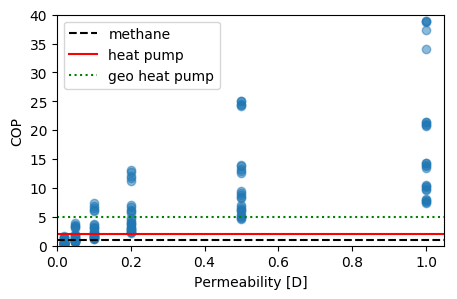

PyObject Text(0.5,24,u'Permeability [D]')

In [15]:
figure(figsize=(5,3))
plot(df_geo[:k_m2]*1e12, df_geo[:COP], "o", alpha = 0.5)
plot([0,1.1], [1.0, 1.0], "--k", label = "methane")
plot([0,1.1], [2.0, 2.0], "-r", label = "heat pump")
plot([0,1.1], [5.0, 5.0], ":g", label = "geo heat pump")
axis([0,1.05,0,40])
legend()
ylabel("COP")
xlabel("Permeability [D]")

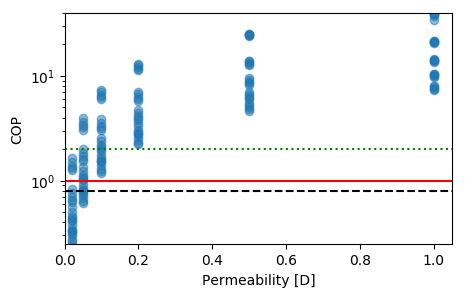

PyObject Text(0.5,24,u'Permeability [D]')

In [20]:
figure(figsize=(5,3))
semilogy(df_geo[:k_m2]*1e12, df_geo[:COP], "o", alpha = 0.5)
semilogy([0,1.1], [0.8, 0.8], "--k", label = "methane")
semilogy([0,1.1], [1.0, 1.0], "-r", label = "heat pump")
semilogy([0,1.1], [2.0, 2.0], ":g", label = "geo heat pump")
axis([0,1.05,0,40])
# legend()
ylabel("COP")
xlabel("Permeability [D]")